# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Abiyyu Zahy Al Akram
- **Email:** abiyyuzahy02@gmail.com
- **ID Dicoding:** paman_leto

## Menentukan Pertanyaan Bisnis

- Pada bulan keberapa tingkat penyewaan tertinggi? dan bagaimana peforma penyewaan dalam beberapa bulan terakhir?
- bagaimana peforma penyewaan dalam 2 tahun terakhir?


## Import Semua Packages/Library yang Digunakan

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [9]:
day_df = pd.read_csv("/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- 5 baris pada dataset


### Assessing Data

In [ ]:
day_df.info()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Memberikan informasi dan mencari duplikasi

### Cleaning Data

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Membersihkan data dengan mengubah tipe data menjadi tipe data yang sesuai

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_df.describe(include="all")
day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["mean"]
})

,instant,cnt
,nunique,mean
mnth,,
1,62,2176.338710
2,57,2655.298246
3,62,3692.258065
4,60,4484.900000
5,62,5349.774194
6,60,5772.366667
7,62,5563.677419
8,62,5664.419355


**Insight:**
- Mencari Mean pada penyewaan sepeda dalam waktu bulan

In [ ]:
day_df.describe(include="all")
day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": ["mean"]
})


,instant,cnt
,nunique,mean
yr,,
0,365,3405.761644
1,366,5599.934426


**Insight:**
- Mencari Mean pada penyewaan sepeda dalam waktu tahun

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-10-772f83a4e575>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_cnt.index, y=mean_cnt.values, palette="viridis")


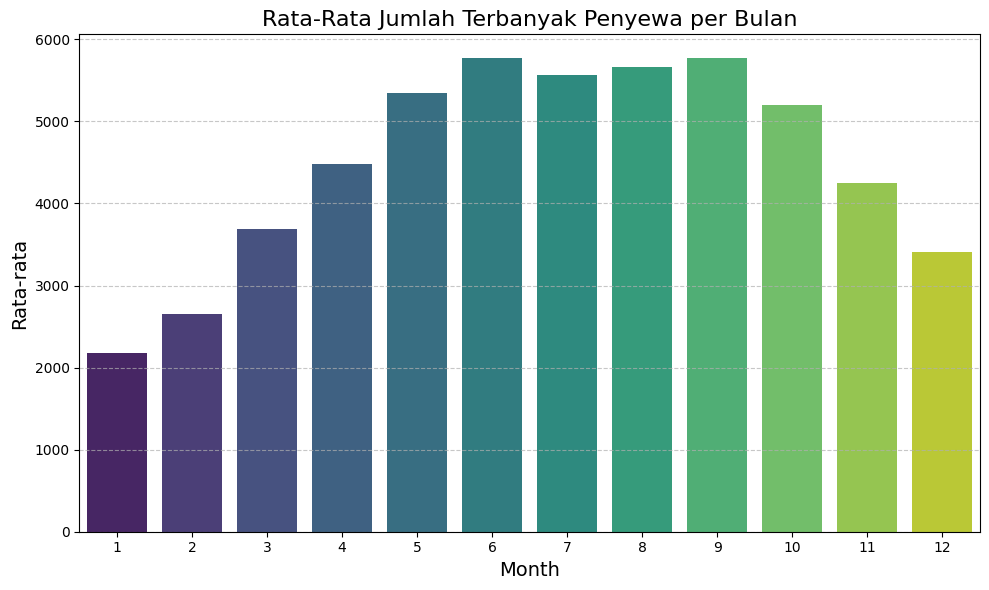

In [10]:
bar_chart = day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["mean"]
})

# Ambil rata-rata (mean) dari cnt untuk setiap bulan
mean_cnt = bar_chart[('cnt', 'mean')]

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_cnt.index, y=mean_cnt.values, palette="viridis")

# Tambahkan elemen visualisasi
plt.title("Rata-Rata Jumlah Terbanyak Penyewa per Bulan", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Rata-rata", fontsize=14)
plt.xticks(ticks=range(len(mean_cnt.index)), labels=mean_cnt.index)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Tampilkan plot
plt.show()


### Pertanyaan 2:

<ipython-input-15-0b887bc260c3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_cnt.index, y=mean_cnt.values, palette="viridis")


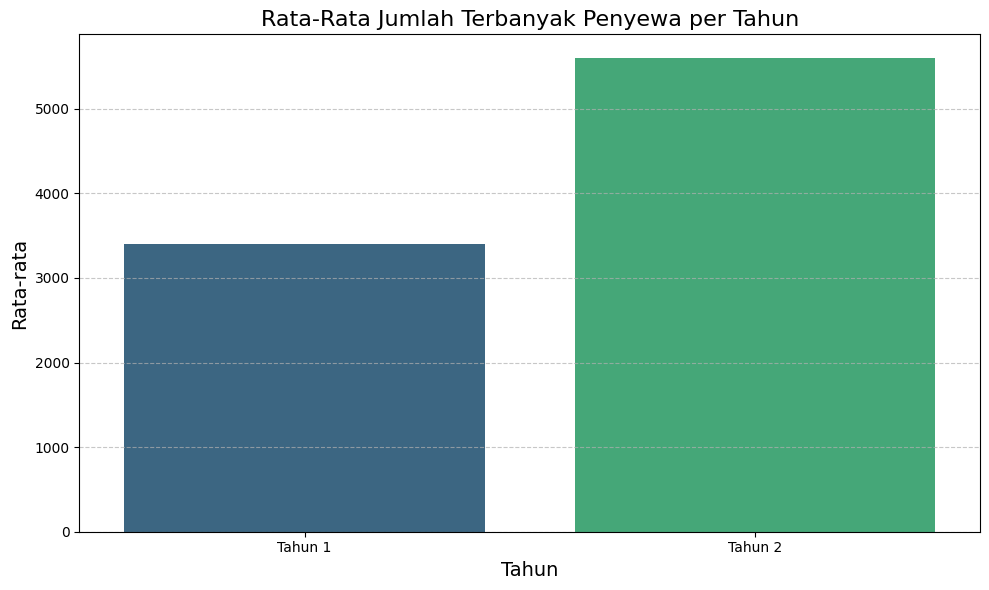

In [15]:
bar_chart = day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": ["mean"]
})

# Ambil rata-rata (mean) dari cnt untuk setiap bulan
mean_cnt = bar_chart[('cnt', 'mean')]

# buat variabel mean cnt index yang dari angka 0 dan 1 menjadi string
year_labels = {0: "Tahun 1", 1: "Tahun 2"}
mean_cnt.index = mean_cnt.index.map(year_labels)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_cnt.index, y=mean_cnt.values, palette="viridis")

# Tambahkan elemen visualisasi
plt.title("Rata-Rata Jumlah Terbanyak Penyewa per Tahun", fontsize=16)
plt.xlabel("Tahun", fontsize=14)
plt.ylabel("Rata-rata", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Tampilkan plot
plt.show()

## Conclusion

- Conclution pertanyaan 1
  Berdasarkan analisis yang telah dilakukan terdapat beberapa poin, yaitu:
  1. Tren Peningkatan Jumlah Penyewa: Rata-rata jumlah penyewa menunjukkan tren peningkatan dari bulan Januari hingga September. Hal ini mungkin disebabkan oleh faktor musiman atau peningkatan aktivitas tertentu selama periode tersebut.
  2. Puncak Penyewa: Bulan dengan rata-rata jumlah penyewa tertinggi adalah bulan Agustus dan September. Ini menunjukkan bahwa periode ini memiliki permintaan yang sangat tinggi.
  3. Penurunan Setelah Puncak: Setelah September, rata-rata jumlah penyewa mulai menurun secara bertahap, dengan angka yang signifikan lebih rendah pada bulan Desember.

  Analisis data tersebut menunjukkan pola musiman dengan puncak aktivitas pada akhir musim panas hingga awal musim gugur, diikuti oleh penurunan menjelang akhir tahun. Hal ini dapat membantu dalam perencanaan strategi pemasaran dan alokasi sumber daya.

- Conclution pertanyaan 2
  Berdasarkan analisis yang telah dilakukan terdapat beberapa poin, yaitu:
  1. Peningkatan Rata-rata Penyewa per Tahun: Terdapat peningkatan signifikan dalam rata-rata jumlah penyewa dari "Year 0" ke "Year 1".
  2. Pertumbuhan yang Konsisten: Grafik menunjukkan pertumbuhan positif dalam jumlah rata-rata penyewa dari 2 tahun terakhir.
  3. Indikasi Performa: Data ini menunjukkan bahwa performa bisnis terkait penyewaan terus membaik dari tahun sebelumnya, yang dapat memberikan kepercayaan untuk investasi lebih lanjut.

  Peningkatan rata-rata penyewa per tahun menunjukkan tren yang positif. Hal ini perlu dimanfaatkan untuk mempertahankan atau bahkan meningkatkan momentum di tahun-tahun mendatang.